#Problem 5

In [ ]:
#download the model
!git clone https://github.com/xavysp/DexiNed.git
%cd DexiNed

Cloning into 'DexiNed'...
remote: Enumerating objects: 1051, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1051 (delta 87), reused 101 (delta 45), pack-reused 904
Receiving objects: 100% (1051/1051), 158.92 MiB | 28.34 MiB/s, done.
Resolving deltas: 100% (517/517), done.
/content/DexiNed


In [ ]:
#check for graphics card
!nvidia-smi

Sat Dec 11 06:47:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install kornia

     |████████████████████████████████| 401 kB 5.5 MB/s 


In [ ]:
#downloading the pretrained weights
!gdown --id 1V56vGTsu7GYiQouCIKvTWl5UKCZ6yCNu

Downloading...
From: https://drive.google.com/uc?id=1V56vGTsu7GYiQouCIKvTWl5UKCZ6yCNu
To: /content/DexiNed/10_model.pth
100% 141M/141M [00:00<00:00, 144MB/s]


In [ ]:
%mkdir -p checkpoints/BIPED/10
%mv 10_model.pth checkpoints/BIPED/10/

##TINY

In [ ]:
%cd /content/
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

/content
--2021-12-11 06:47:45--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  53.1MB/s    in 5.0s    

2021-12-11 06:47:50 (47.6 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [ ]:
%mv tiny-imagenet-200/ TINY-images

In [ ]:
%rm -rf TINY-edges/

In [ ]:
%rm -rf DexiNed/data/*

In [ ]:
%rm -rf /content/DexiNed/result/

Running edge detection on test dataset and storing the results

In [ ]:
%%shell
cd /content/DexiNed/
# data_dir = "/content/TINY-images"
for dir in /content/TINY-images/test/*/    # list directories in the form "/tmp/dirname/"
do
    dir=${dir%*/}      # remove the trailing "/"
    mkdir -p "/content/TINY-edges/test/${dir##*/}"

    rm -rf /content/DexiNed/data/*
    rm -rf /content/DexiNed/result/

    cp -v `ls -d /content/TINY-images/test/${dir##*/}/* | head -1000` /content/DexiNed/data

    python /content/DexiNed/main.py --choose_test_data=-1

    mv -v /content/DexiNed/result/BIPED2CLASSIC/fused/* /content/TINY-edges/test/${dir##*/}/
    
    echo "${dir##*/}"    # print everything after the final "/"
done

cd /content/

'/content/TINY-images/test/images/test_0.JPEG' -> '/content/DexiNed/data/test_0.JPEG'
'/content/TINY-images/test/images/test_1000.JPEG' -> '/content/DexiNed/data/test_1000.JPEG'
'/content/TINY-images/test/images/test_1001.JPEG' -> '/content/DexiNed/data/test_1001.JPEG'
'/content/TINY-images/test/images/test_1002.JPEG' -> '/content/DexiNed/data/test_1002.JPEG'
'/content/TINY-images/test/images/test_1003.JPEG' -> '/content/DexiNed/data/test_1003.JPEG'
'/content/TINY-images/test/images/test_1004.JPEG' -> '/content/DexiNed/data/test_1004.JPEG'
'/content/TINY-images/test/images/test_1005.JPEG' -> '/content/DexiNed/data/test_1005.JPEG'
'/content/TINY-images/test/images/test_1006.JPEG' -> '/content/DexiNed/data/test_1006.JPEG'
'/content/TINY-images/test/images/test_1007.JPEG' -> '/content/DexiNed/data/test_1007.JPEG'
'/content/TINY-images/test/images/test_1008.JPEG' -> '/content/DexiNed/data/test_1008.JPEG'
'/content/TINY-images/test/images/test_1009.JPEG' -> '/content/DexiNed/data/test_1009.

running edge detection on train dataset and storing results

In [ ]:
%%shell
cd /content/DexiNed/
# data_dir = "/content/TINY-images"
for dir in /content/TINY-images/train/*/    # list directories in the form "/tmp/dirname/"
do
    dir=${dir%*/}      # remove the trailing "/"
    mkdir -p "/content/TINY-edges/train/${dir##*/}"

    rm -rf /content/DexiNed/data/*
    rm -rf /content/DexiNed/result/

    cp -v `ls -d /content/TINY-images/train/${dir##*/}/images/* | head -1000` /content/DexiNed/data

    python /content/DexiNed/main.py --choose_test_data=-1

    mv -v /content/DexiNed/result/BIPED2CLASSIC/fused/* /content/TINY-edges/train/${dir##*/}/
    
    echo "${dir##*/}"    # print everything after the final "/"
done

cd /content/

'/content/TINY-images/train/n01443537/images/n01443537_0.JPEG' -> '/content/DexiNed/data/n01443537_0.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_100.JPEG' -> '/content/DexiNed/data/n01443537_100.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_101.JPEG' -> '/content/DexiNed/data/n01443537_101.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_102.JPEG' -> '/content/DexiNed/data/n01443537_102.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_103.JPEG' -> '/content/DexiNed/data/n01443537_103.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_104.JPEG' -> '/content/DexiNed/data/n01443537_104.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_105.JPEG' -> '/content/DexiNed/data/n01443537_105.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_106.JPEG' -> '/content/DexiNed/data/n01443537_106.JPEG'
'/content/TINY-images/train/n01443537/images/n01443537_107.JPEG' -> '/content/DexiNed/data/n01443537_107.JPEG'
'/con

CalledProcessError: ignored

#Edges and Edge-enhanced images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from natsort import natsorted as nsort
%matplotlib inline

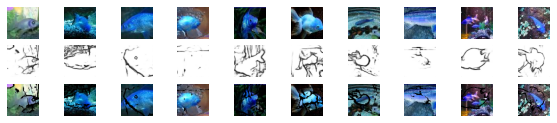

In [ ]:
#combined example
images_path = nsort([image for image in os.listdir(os.path.join('TINY-edges','train','n01443537'))])
input_path = nsort([image for image in os.listdir(os.path.join('TINY-images','train','n01443537','images'))])


fig = plt.figure(figsize=(10,2))

# setting values to rows and column variables
rows = 3
columns = 10

for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(os.path.join(os.path.join('TINY-images','train','n01443537','images',input_path[i])))
  plt.imshow(image)
  plt.axis('off')
  
#edges
for i in range(columns, 2*columns):
  fig.add_subplot(rows, columns, i+1)
  image = cv2.imread(os.path.join(os.path.join('TINY-edges','train','n01443537',images_path[i-columns])))
  plt.imshow(image)
  plt.axis('off')

# edge enhanced images
for i in range(2*columns, 3*columns):
  fig.add_subplot(rows, columns, i+1)
  original = cv2.imread(os.path.join(os.path.join('TINY-images','train','n01443537','images',input_path[i-2*columns])))
  edges = cv2.imread(os.path.join(os.path.join('TINY-edges','train','n01443537',images_path[i-2*columns])))
  img2 = original.copy()
  img2[edges[:,:,0] <= 200] = [0, 0, 0]  
  plt.imshow(img2)
  plt.axis('off')



##Individual Exapmles

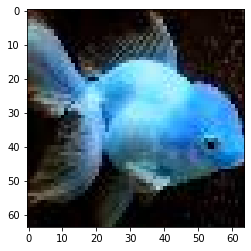

In [ ]:
#Original image
img = cv2.imread(os.path.join(os.path.join('TINY-images','train','n01443537','images',input_path[5])))  # creat RGB image from grayscale
plt.imshow(img)


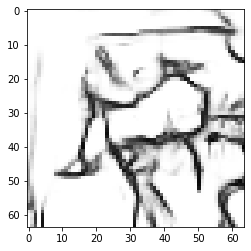

In [ ]:
#detected edge
edges = cv2.imread(os.path.join(os.path.join('TINY-edges','train','n01443537',images_path[5])))
plt.imshow(edges)

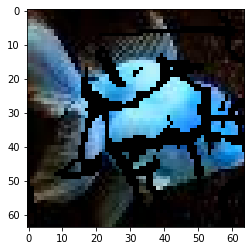

In [ ]:
#Edge-enhanced image
img2 = img.copy()
img2[edges[:,:,0] <= 200] = [0, 0, 0]  
plt.imshow(img2)

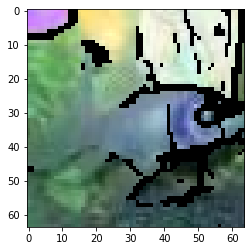

In [ ]:
#another example
img = cv2.imread(os.path.join(os.path.join('TINY-images','train','n01443537','images',input_path[0])))
edges = cv2.imread(os.path.join(os.path.join('TINY-edges','train','n01443537',images_path[0])))
img2 = img.copy()
img2[edges[:,:,0] <= 200] = [0, 0, 0]  
plt.imshow(img2)

##Saving edge enhanced images for further problems

In [ ]:
%rm -rf TINY-enhanced/

In [ ]:
%mkdir -p /content/TINY-enhanced/train/

data_dir1 = '/content/TINY-images/'
data_dir2 = '/content/TINY-edges/'

#print(os.listdir(data_dir))
classes = os.listdir(data_dir1+ "/train")
print(classes)

['n02948072', 'n04376876', 'n03838899', 'n02841315', 'n03042490', 'n04285008', 'n01443537', 'n04099969', 'n04254777', 'n09332890', 'n04532670', 'n04146614', 'n02823428', 'n04501370', 'n02099712', 'n01698640', 'n04149813', 'n03447447', 'n12267677', 'n03976657', 'n02236044', 'n07768694', 'n02403003', 'n01917289', 'n03770439', 'n02730930', 'n04311004', 'n04366367', 'n03179701', 'n02106662', 'n04507155', 'n02795169', 'n02124075', 'n02504458', 'n01855672', 'n02843684', 'n01644900', 'n03250847', 'n03970156', 'n04456115', 'n02395406', 'n09246464', 'n02321529', 'n03584254', 'n03763968', 'n02123045', 'n02977058', 'n02999410', 'n03544143', 'n02132136', 'n07583066', 'n04398044', 'n03599486', 'n02788148', 'n01945685', 'n02486410', 'n03255030', 'n02206856', 'n02437312', 'n02769748', 'n02814860', 'n03126707', 'n04596742', 'n01768244', 'n03400231', 'n03706229', 'n01984695', 'n02281406', 'n02165456', 'n02950826', 'n07873807', 'n02791270', 'n03983396', 'n03837869', 'n02226429', 'n07711569', 'n02123394'

In [ ]:
for x in classes:
  path = os.path.join('TINY-enhanced', 'train', x)
  os.mkdir(path)

  images_path = nsort([image for image in os.listdir(os.path.join('TINY-edges','train',x))])
  input_path = nsort([image for image in os.listdir(os.path.join('TINY-images','train',x,'images'))])

  
  for i in range(len(images_path)):
    original = cv2.imread(os.path.join(os.path.join('TINY-images', 'train', x, 'images',input_path[i])))

    edges = cv2.imread(os.path.join(os.path.join('TINY-edges', 'train', x, images_path[i])))
    img2 = original.copy()
    img2[edges[:,:,0] <= 200] = [0, 0, 0]  
    cv2.imwrite(os.path.join(path, images_path[i]), img2)
  

In [ ]:
%mkdir -p /content/TINY-enhanced/test/

data_dir1 = '/content/TINY-images/'
data_dir2 = '/content/TINY-edges/'

#print(os.listdir(data_dir))
classes = os.listdir(data_dir1 + "/test")
print(classes)

['images']


In [ ]:
for x in classes:
  path = os.path.join('TINY-enhanced', 'test', x)
  os.mkdir(path)

  images_path = nsort([image for image in os.listdir(os.path.join('TINY-edges','test',x))])
  input_path = nsort([image for image in os.listdir(os.path.join('TINY-images','test',x))])

  
  for i in range(len(images_path)):
    original = cv2.imread(os.path.join(os.path.join('TINY-images', 'test', x, input_path[i])))
  
    edges = cv2.imread(os.path.join(os.path.join('TINY-edges', 'test', x, images_path[i])))
    img2 = original.copy()
    img2[edges[:,:,0] <= 200] = [0, 0, 0]  
    cv2.imwrite(os.path.join(path, images_path[i]), img2)
  

#Problem 6

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Look into the data directory
data_dir = '/content/TINY-edges'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['dog', 'bird', 'frog', 'airplane', 'horse', 'ship', 'automobile', 'truck', 'cat', 'deer']


In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

batch_size = 400

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.0625, 'val_loss': 2.3220200538635254}]

In [ ]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 2.2383, val_loss: 2.6827, val_acc: 0.1437
Epoch [1], last_lr: 0.00147, train_loss: 1.8433, val_loss: 3.0383, val_acc: 0.1575
Epoch [2], last_lr: 0.00274, train_loss: 1.7394, val_loss: 4.6805, val_acc: 0.1562
Epoch [3], last_lr: 0.00430, train_loss: 1.7306, val_loss: 3.5388, val_acc: 0.1813
Epoch [4], last_lr: 0.00598, train_loss: 1.7624, val_loss: 3.2149, val_acc: 0.2138
Epoch [5], last_lr: 0.00757, train_loss: 1.7912, val_loss: 2.6197, val_acc: 0.2900
Epoch [6], last_lr: 0.00886, train_loss: 1.9491, val_loss: 6.4077, val_acc: 0.2800
Epoch [7], last_lr: 0.00971, train_loss: 2.2017, val_loss: 4.1552, val_acc: 0.1750
Epoch [8], last_lr: 0.01000, train_loss: 1.9878, val_loss: 4.9894, val_acc: 0.1238
Epoch [9], last_lr: 0.00994, train_loss: 2.0005, val_loss: 2.3302, val_acc: 0.2581
Epoch [10], last_lr: 0.00978, train_loss: 1.6856, val_loss: 1.8741, val_acc: 0.3931
Epoch [11], last_lr: 0.00950, train_loss: 1.6709, val_loss: 2.6709, val_acc: 0.2794
Ep

#Problem 7


In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Look into the data directory
data_dir = '/content/TINY-enhanced'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['dog', 'bird', 'frog', 'airplane', 'horse', 'ship', 'automobile', 'truck', 'cat', 'deer']


In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# PyTorch datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/test', valid_tfms)

batch_size = 400

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)



In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [ ]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.07437500357627869, 'val_loss': 2.303762912750244}]

In [ ]:
epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00066, train_loss: 2.0448, val_loss: 2.1311, val_acc: 0.2031
Epoch [1], last_lr: 0.00147, train_loss: 1.5284, val_loss: 1.9784, val_acc: 0.3331
Epoch [2], last_lr: 0.00274, train_loss: 1.4074, val_loss: 2.0877, val_acc: 0.3981
Epoch [3], last_lr: 0.00430, train_loss: 1.3680, val_loss: 3.7852, val_acc: 0.2281
Epoch [4], last_lr: 0.00598, train_loss: 1.3404, val_loss: 2.8143, val_acc: 0.3031
Epoch [5], last_lr: 0.00757, train_loss: 1.4545, val_loss: 2.0000, val_acc: 0.4756
Epoch [6], last_lr: 0.00886, train_loss: 1.7784, val_loss: 4.0734, val_acc: 0.3069
Epoch [7], last_lr: 0.00971, train_loss: 1.8633, val_loss: 2.6440, val_acc: 0.4313
Epoch [8], last_lr: 0.01000, train_loss: 1.5456, val_loss: 1.8102, val_acc: 0.4675
Epoch [9], last_lr: 0.00994, train_loss: 1.4121, val_loss: 1.6083, val_acc: 0.5450
Epoch [10], last_lr: 0.00978, train_loss: 1.1632, val_loss: 1.3159, val_acc: 0.5606
Epoch [11], last_lr: 0.00950, train_loss: 1.0417, val_loss: 1.3612, val_acc: 0.5462
Ep